<a href="https://colab.research.google.com/github/jyoti-kumbhar/Data-Science/blob/main/prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical 6
* Aim: Regression and Its Types
1. Implement simple linear regression using a dataset.
2. Explore and interpret the regression model coefficients and goodness-of-fit measures.
3. Extend the analysis to multiple linear regression and assess the impact of additional predictors.
* T091 Jyoti Kumbhar

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/Fish_weight.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


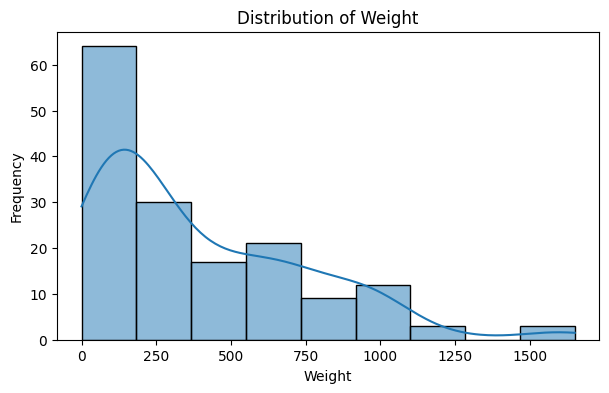

In [4]:
#Data Distribution plot
# numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(7,4))
sns.histplot(df['Weight'], kde=True)
plt.title(f"Distribution of Weight")
plt.xlabel('Weight')
plt.ylabel("Frequency")
plt.show()

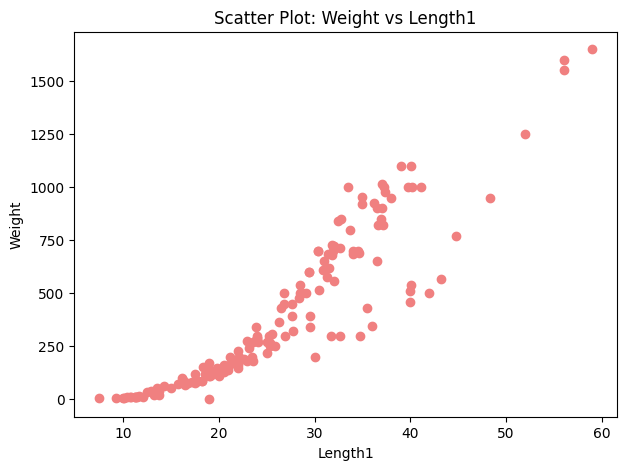

In [5]:
#scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['Length1'], df['Weight'],color = 'lightcoral')
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.title("Scatter Plot: Weight vs Length1")
plt.show()

Simple Linear Regression

In [6]:
#split the independent and dependent variables
y = df['Weight']
X = df.drop('Weight', axis=1)

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (127, 6)
Testing set shape: (32, 6)


In [13]:
#dropping species beacuse it contains categorical data
X_train_numeric = X_train.drop('Species', axis=1)
X_test_numeric = X_test.drop('Species', axis=1)
# Train model
regressor = LinearRegression()
regressor.fit(X_train_numeric, y_train)
# Predictions
y_pred_train = regressor.predict(X_train_numeric)
y_pred_test = regressor.predict(X_test_numeric)

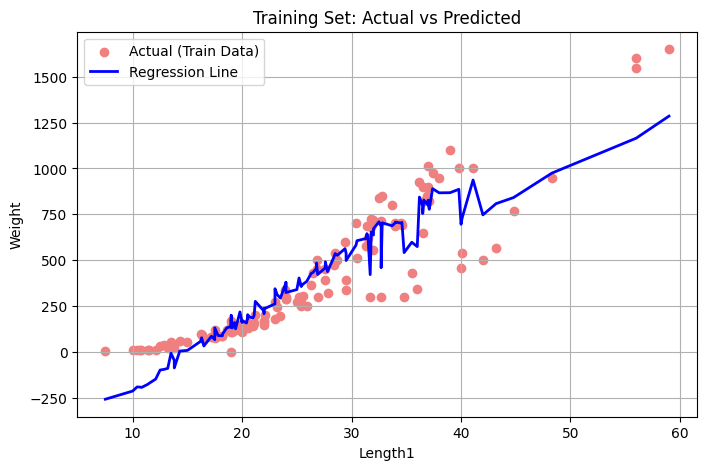

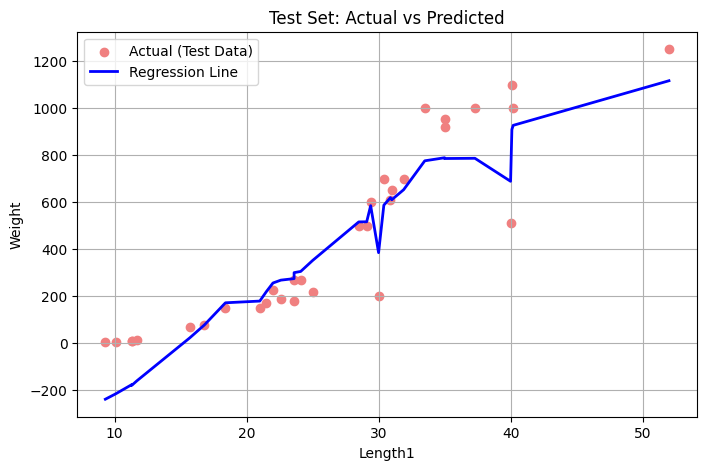

In [19]:
# Sort training data for smooth regression line
# Use a specific numeric column for sorting and plotting
x_train_plot = X_train_numeric['Length1']
sorted_idx = np.argsort(x_train_plot) # Sort only the chosen column
X_train_sorted = x_train_plot.iloc[sorted_idx]
y_pred_train_sorted = y_pred_train[sorted_idx]

# ---------- TRAINING SET ----------
plt.figure(figsize=(8,5))
plt.scatter(x_train_plot, y_train, color = 'lightcoral', label='Actual (Train Data)')
plt.plot(X_train_sorted, y_pred_train_sorted, color='blue', linewidth=2, label='Regression Line')
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.title("Training Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# ---------- TEST SET ----------
# Sort test set
x_test_plot = X_test_numeric['Length1']
sorted_idx_test = np.argsort(x_test_plot) # Sort only the chosen column
X_test_sorted = x_test_plot.iloc[sorted_idx_test]
y_pred_test_sorted = y_pred_test[sorted_idx_test]

plt.figure(figsize=(8,5))
plt.scatter(x_test_plot, y_test, color = 'lightcoral', label='Actual (Test Data)')
plt.plot(X_test_sorted, y_pred_test_sorted, color='blue', linewidth=2, label='Regression Line')
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.title("Test Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

Conclusion:

The simple linear regression model shows a general positive relationship between Length1 and Weight, but the prediction accuracy is low. Both the training and test graphs show widely scattered actual data points around the regression line, meaning weight cannot be predicted accurately using only Length1. The model captures the trend but not the exact values.

In [20]:
# Regressor coefficients and intercept
print("Coefficient (m):", regressor.coef_[0])
print("Intercept (c):", regressor.intercept_)
# Linear equation form
print(f"\nLinear Equation:  y = {regressor.coef_[0]:.4f}x + {regressor.intercept_:.4f}")

Coefficient (m): 43.535264900904345
Intercept (c): -515.305651338433

Linear Equation:  y = 43.5353x + -515.3057


Multiple Linear Regression

In [21]:
# One-hot encoding for categorical column 'Species'
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)

In [22]:
# Define X and y
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predictions
y_pred_train = regressor.predict(X_train)
y_pred_test  = regressor.predict(X_test)

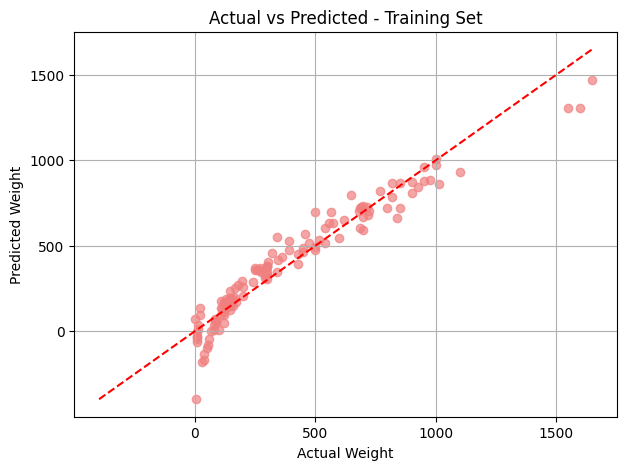

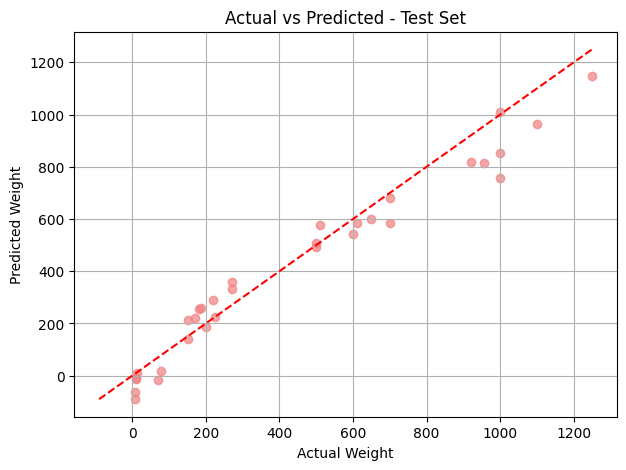

In [28]:
#train set
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_pred_train, alpha=0.7,color='lightcoral')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted - Training Set")
plt.grid(True)
# Plot perfect prediction line
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

# test set
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, color='lightcoral', alpha=0.7)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted - Test Set")
plt.grid(True)
# Perfect prediction reference line
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

Conclusion:

The multiple linear regression model performs well on both the training and test sets. Most predicted weights are close to the actual weights, indicating good model accuracy and generalization. Only a few points deviate from the diagonal line, showing minor prediction errors.

In [26]:
# Compare predicted result with actual value
np.set_printoptions(precision=2)
result = np.concatenate((y_pred_test.reshape(len(y_pred_test), 1),
y_test.values.reshape(len(y_test), 1)),axis=1)
result

array([[  18.74,   78.  ],
       [  11.89,   13.4 ],
       [ 187.71,  200.  ],
       [ 332.74,  270.  ],
       [ 212.1 ,  150.  ],
       [ 757.76, 1000.  ],
       [ -61.14,    7.  ],
       [ 255.77,  180.  ],
       [ 260.49,  188.  ],
       [1148.32, 1250.  ],
       [ 600.43,  650.  ],
       [ 852.96, 1000.  ],
       [ 541.63,  600.  ],
       [ 140.06,  150.  ],
       [ 680.96,  700.  ],
       [ 818.78,  920.  ],
       [1009.77, 1000.  ],
       [ 289.7 ,  218.  ],
       [ 226.07,  225.  ],
       [ 585.14,  700.  ],
       [ -11.02,   10.  ],
       [ 585.71,  610.  ],
       [ 509.58,  500.  ],
       [ 492.02,  500.  ],
       [ 814.27,  955.  ],
       [ 964.09, 1100.  ],
       [ 219.24,  170.  ],
       [ 356.94,  270.  ],
       [ -90.41,    6.7 ],
       [ -11.87,    9.9 ],
       [ 575.81,  510.  ],
       [ -18.41,   70.  ]])

Conclusion:

Simple Linear Regression with one feature shows general trends but less accurate predictions. Multiple Linear Regression uses several features and predicts fish weight more accurately, making it more reliable.